<a href="https://colab.research.google.com/github/Calvince1/Cal/blob/main/MML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Loading the Income Dataset
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tabulate import tabulate  # Import tabulate for pretty printing (optional)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_income = pd.read_excel('/content/drive/MyDrive/General/Income_Returns - B.xls')
df_income.head()

,pin_no,station_name,obligation_name,filing_period,gross_tax_payable,Net_Tax - off Credits,filing_date,trp_from_dt,trp_to_dt,is_nil_return,...,chargeableincome,Income,unsuedlossesbf,taxableincome,instalmenttax,withheldtax,advancetaxpaid,advancepayments,totalcredits,creditsec41
0,A003699794A,Thika,Income Tax - Resident,2021 - DEC,4590.0,4590.0,2022-04-01 11:01:10.255,2021-01-01,2021-12-31,N,...,306360.00,Medium,0.0,306360.00,0,0,0,0,0,0
1,A003233861Z,PREMIER TAX OFFICE,Income Tax - Resident,2021 - DEC,117009.0,26102.0,2022-04-27 10:30:38.063,2021-01-01,2021-12-31,N,...,694695.00,Small,0.0,694695.00,0,0,0,0,0,0
2,A004212524B,BUNGOMA,Income Tax - Resident,2021 - DEC,18900.0,0.0,2022-05-04 09:55:16.110,2021-01-01,2021-12-31,N,...,189000.00,Small,0.0,189000.00,0,0,0,0,0,0
3,A000110971B,South of Nairobi,Income Tax - Resident,2021 - DEC,0.0,0.0,2022-04-01 15:21:27.121,2021-01-01,2021-12-31,N,...,175000.00,Small,0.0,175000.00,0,0,0,0,0,0
4,A006535791K,KITUI,Income Tax - Resident,2021 - DEC,1785.0,1785.0,2022-04-27 10:15:05.649,2021-01-01,2021-12-31,N,...,295137.18,Small,0.0,295137.18,0,0,0,0,0,0


In [4]:
#Data Dimesion
df_income.shape

(9187, 30)

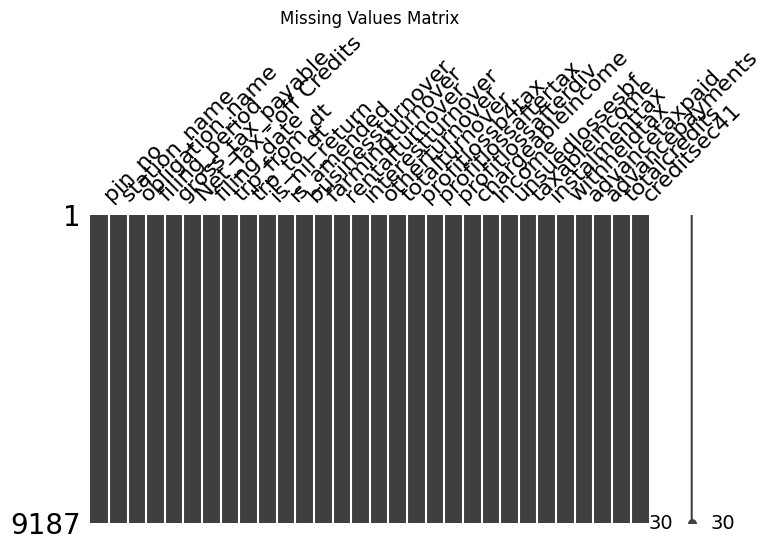

In [5]:
#Finding any null values
df_income.isna().sum()
# Visualize missing values as a matrix (white lines represent missing values)
msno.matrix(df_income, figsize=(8, 4))
plt.title('Missing Values Matrix')
plt.show()

In [6]:
df_income.dtypes

pin_no                           object
station_name                     object
obligation_name                  object
filing_period                    object
gross_tax_payable               float64
Net_Tax - off Credits           float64
filing_date              datetime64[ns]
trp_from_dt              datetime64[ns]
trp_to_dt                datetime64[ns]
is_nil_return                    object
is_amended                       object
businessturnover                float64
farmingturnover                 float64
rentalturnover                  float64
interestturnover                float64
otherturnover                   float64
totalturnover                   float64
profitlossb4tax                 float64
profitlossaftertax              float64
profitlossafterdiv                int64
chargeableincome                float64
Income                           object
unsuedlossesbf                  float64
taxableincome                   float64
instalmenttax                     int64


In [7]:
df_income.describe()

,gross_tax_payable,Net_Tax - off Credits,businessturnover,farmingturnover,rentalturnover,interestturnover,otherturnover,totalturnover,profitlossb4tax,profitlossaftertax,profitlossafterdiv,chargeableincome,unsuedlossesbf,taxableincome,instalmenttax,withheldtax,advancetaxpaid,advancepayments,totalcredits,creditsec41
count,9.187000e+03,9.187000e+03,9.187000e+03,9.187000e+03,9.187000e+03,9.187000e+03,9.187000e+03,9.187000e+03,9.187000e+03,9.187000e+03,9187.0,9.187000e+03,9.187000e+03,9.187000e+03,9187.0,9187.0,9187.0,9187.0,9187.0,9187.0
mean,6.824931e+05,3.509207e+04,2.761393e+06,3.675068e+04,1.828790e+06,1.813251e+04,3.362600e+04,4.694963e+06,9.927222e+05,9.859180e+05,0.0,9.277229e+05,1.835298e+04,1.027380e+06,0.0,0.0,0.0,0.0,0.0,0.0
std,3.552239e+06,3.152268e+05,5.587329e+07,5.528364e+05,4.664630e+06,3.374391e+05,7.534582e+05,5.614228e+07,9.801876e+06,9.798076e+06,0.0,4.079625e+06,2.865707e+05,3.586001e+06,0.0,0.0,0.0,0.0,0.0,0.0
min,-1.623630e+05,-2.945111e+06,0.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00,0.000000e+00,1.000000e-02,-1.552304e+08,-1.552304e+08,0.0,-1.552304e+08,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.913500e+03,-4.100000e+00,0.000000e+00,0.000000e+00,2.291420e+05,0.000000e+00,0.000000e+00,2.750000e+05,1.193135e+05,1.190225e+05,0.0,1.096240e+05,0.000000e+00,1.228540e+05,0.0,0.0,0.0,0.0,0.0,0.0
50%,3.997500e+04,0.000000e+00,0.000000e+00,0.000000e+00,5.520000e+05,0.000000e+00,0.000000e+00,7.386370e+05,2.987495e+05,2.986000e+05,0.0,2.982540e+05,0.000000e+00,3.013000e+05,0.0,0.0,0.0,0.0,0.0,0.0
75%,3.645610e+05,1.528740e+04,0.000000e+00,0.000000e+00,1.521924e+06,0.000000e+00,0.000000e+00,2.381006e+06,6.237610e+05,6.213523e+05,0.0,6.021460e+05,0.000000e+00,6.150980e+05,0.0,0.0,0.0,0.0,0.0,0.0
max,2.377999e+08,1.681769e+07,4.548798e+09,2.117171e+07,1.027975e+08,1.687391e+07,6.200824e+07,4.551859e+09,8.783097e+08,8.783097e+08,0.0,1.135195e+08,1.057788e+07,1.135195e+08,0.0,0.0,0.0,0.0,0.0,0.0


**Exploratory Data Analysis**

In [8]:
correlation_matrix = df_income.corr()

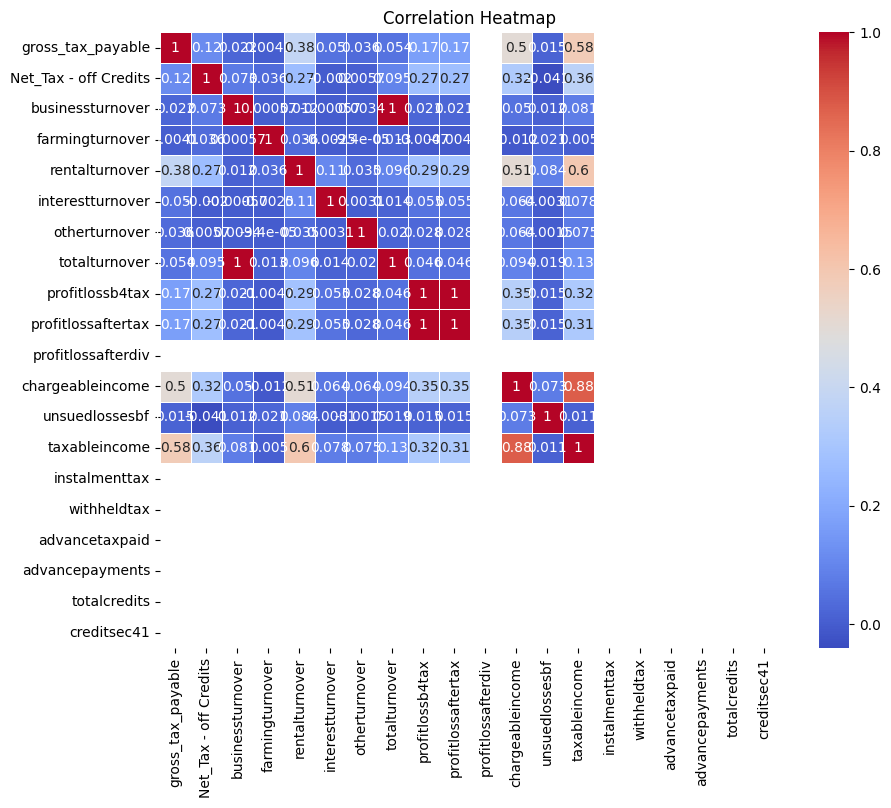

In [9]:
# Set the size of the heatmap
plt.figure(figsize=(10, 8))

# Generate the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Set plot title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

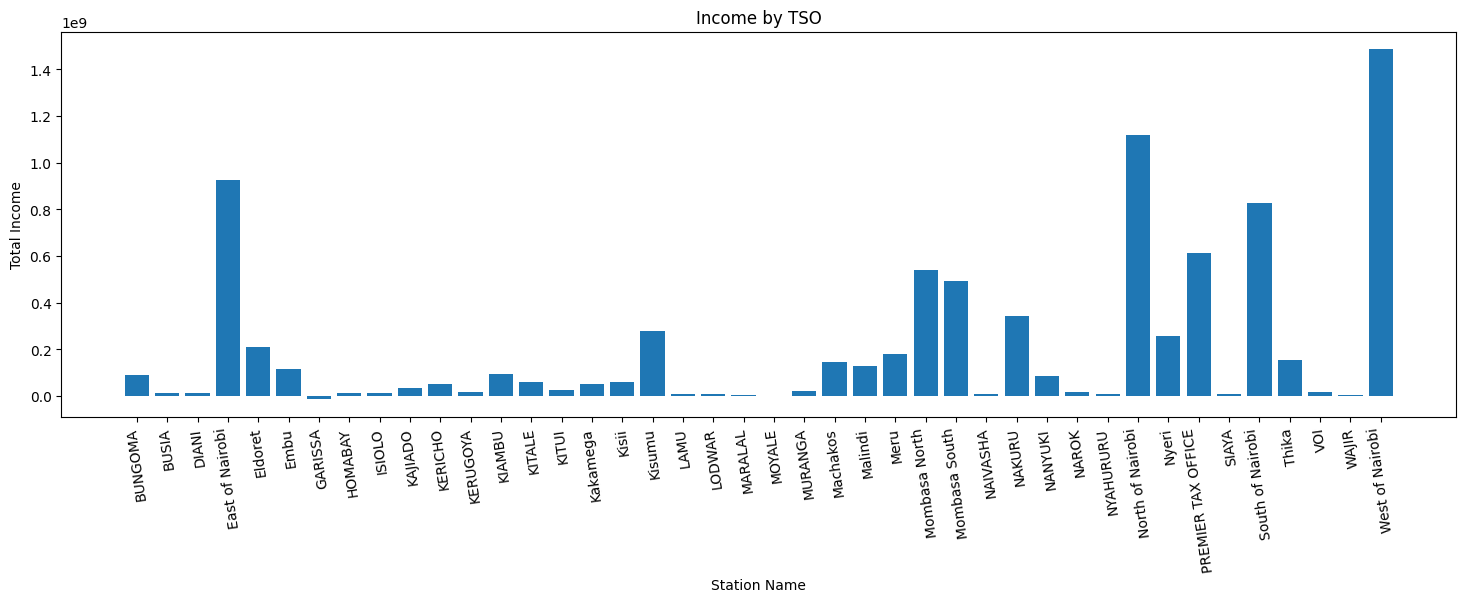

In [10]:
# Grouping by Station Name and calculating the sum of Chargebale Income
Income = df_income.groupby('station_name')['chargeableincome'].sum()

# Creating a bar chart
plt.figure(figsize=(18, 5))
plt.bar(Income.index, Income.values)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=98)

plt.xlabel('Station Name')
plt.ylabel('Total Income')
plt.title('Income by TSO')

# Show the plot
plt.show()

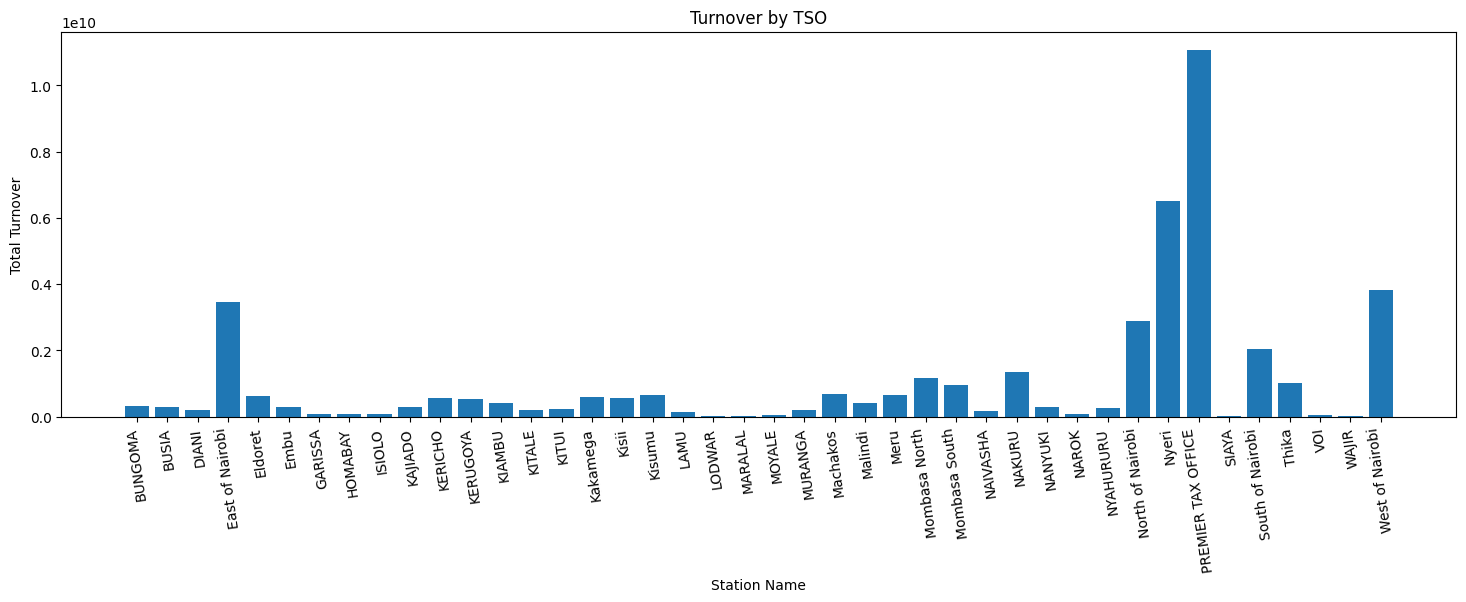

In [11]:
# Grouping by Station Name and calculating the sum of Total Turnover
Turnover = df_income.groupby('station_name')['totalturnover'].sum()

# Creating a bar chart
plt.figure(figsize=(18, 5))
plt.bar(Turnover.index, Turnover.values)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=98)

plt.xlabel('Station Name')
plt.ylabel('Total Turnover')
plt.title('Turnover by TSO')

# Show the plot
plt.show()

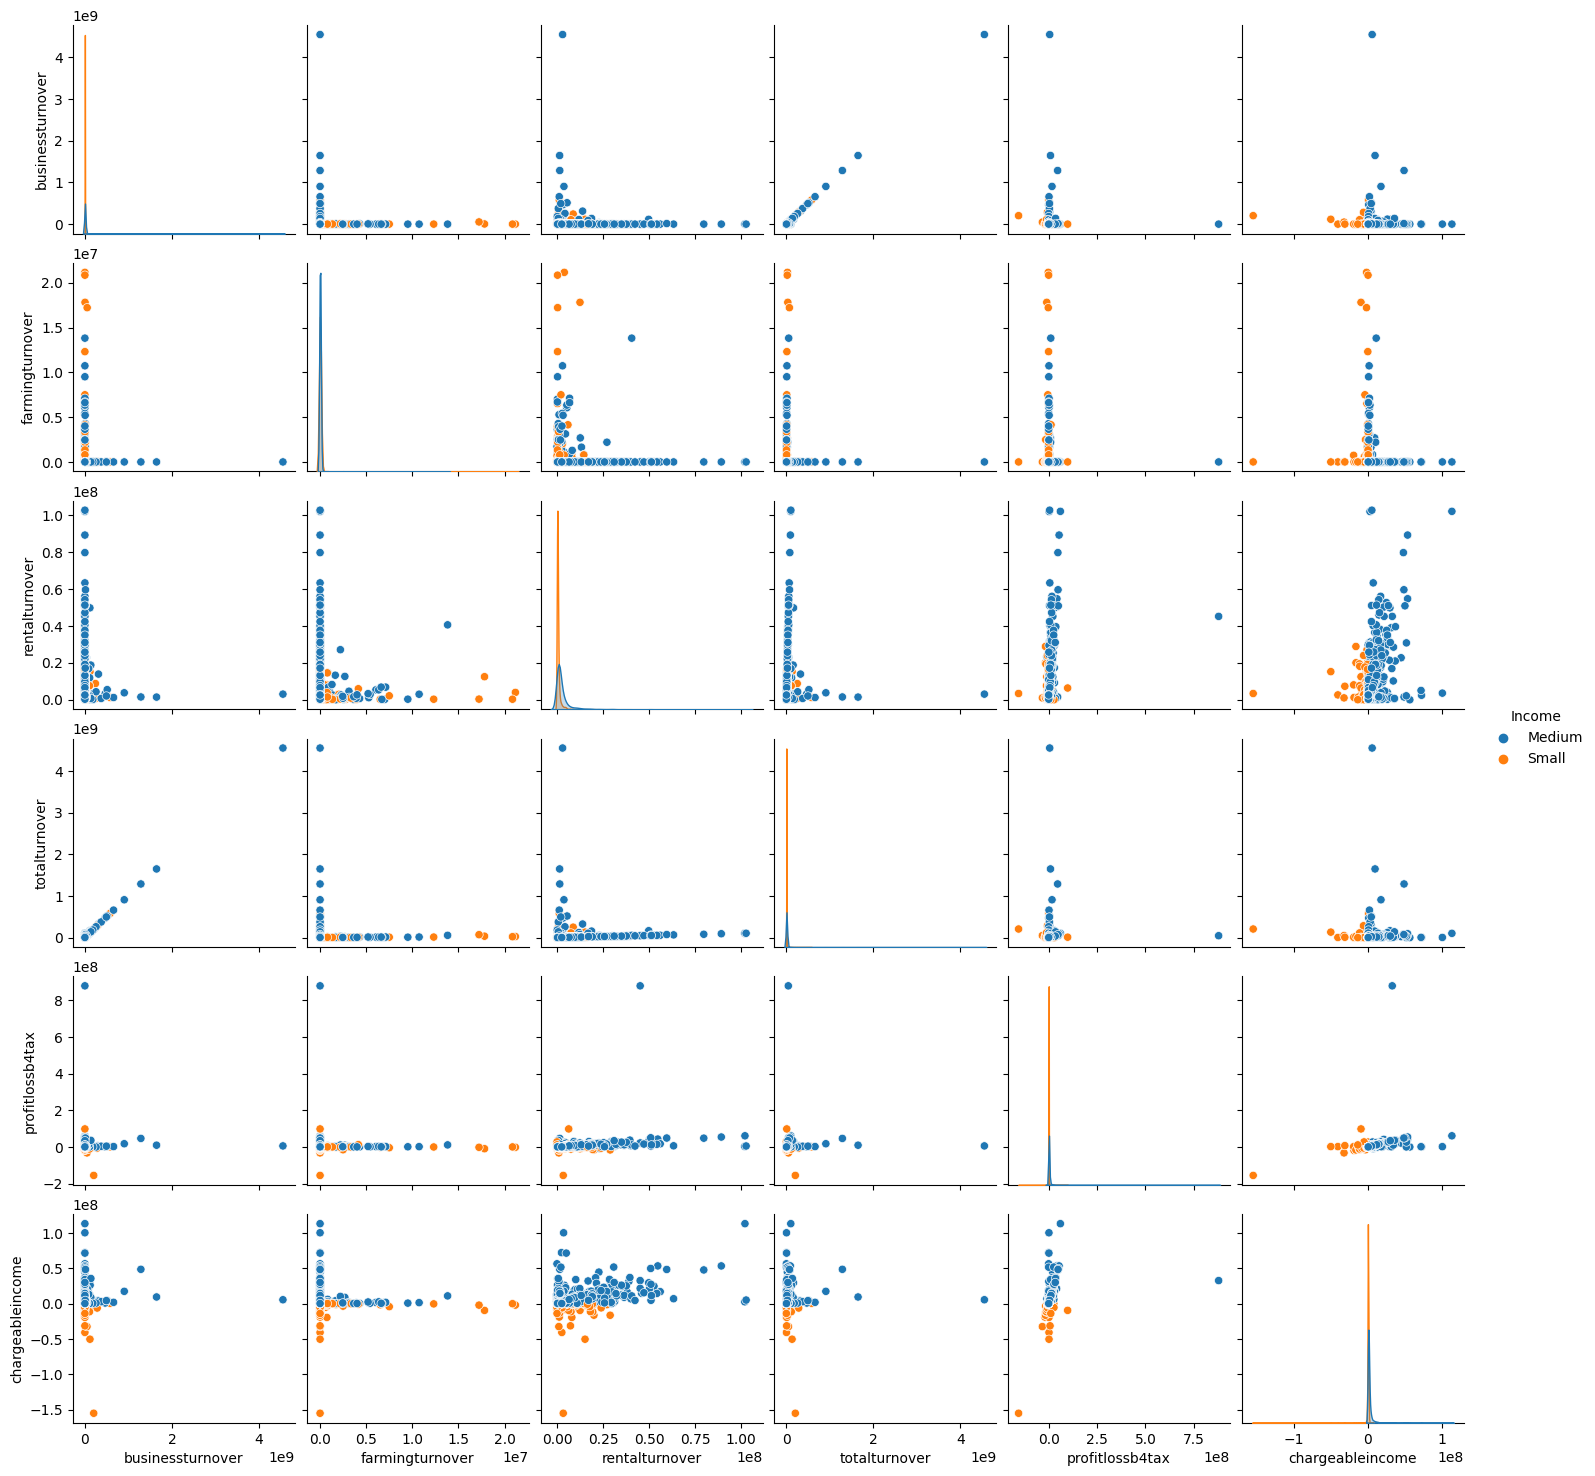

In [12]:
#Pairplot to establish the relationship between select variables and
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df_income[[ 'businessturnover', 'farmingturnover', 'rentalturnover',
         'totalturnover', 'profitlossb4tax','chargeableincome', 'Income']], hue='Income')
plt.show()

**Handling of Outliers Using the quartile range**

In [13]:
#Feature Selection
data = df_income[['businessturnover', 'farmingturnover', 'rentalturnover',
         'totalturnover', 'profitlossb4tax','chargeableincome','Income']]
data.head()

,businessturnover,farmingturnover,rentalturnover,totalturnover,profitlossb4tax,chargeableincome,Income
0,0.0,0.0,1095400.0,1095400.0,306360.0,306360.00,Medium
1,578449423.0,0.0,1255058.0,579704481.0,694695.0,694695.00,Small
2,0.0,0.0,189000.0,189000.0,189000.0,189000.00,Small
3,0.0,0.0,240000.0,240000.0,175000.0,175000.00,Small
4,0.0,0.0,765513.0,765513.0,295137.0,295137.18,Small


**Splitting the Dataset into Train and Test**

In [14]:
# Splitting the dataset into 80% as training and 20% as testing.
X = data.drop(['Income'], axis=1)
y = data['Income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)


**Scaling and Encoding of categorical variable**


In [15]:
# Scaling the dataset to ensure that each feature has the same scale
# defining column transformer to encode categorical variables
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# defining the columns that are categorical variables
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']

# defining the column transformer with both the scaler and the encoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), [col for col in X_train.columns if col not in categorical_cols]),
        ('cat', categorical_transformer, categorical_cols)
    ])

# fit and transform the training and testing data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [16]:
#Train various machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

models = [("Logistic Regression", LogisticRegression(random_state=5, max_iter=100, solver='saga')),
("Decision Tree", DecisionTreeClassifier(random_state=5)),
("Random Forest", RandomForestClassifier(random_state=4)),
("Feed Forward Neural Network", MLPClassifier(random_state=5, max_iter=100)),
("k-Nearest Neighbors", KNeighborsClassifier()),
("Naive Bayes", GaussianNB())]

for name, model in models:
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        model.fit(X_train, y_train)

In [17]:
# Evaluate the performance of each model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, precision_recall_curve, auc
results = {}
for name, model in models:
    y_pred = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, pos_label='Medium'),
        'Recall': recall_score(y_test, y_pred, pos_label='Small'),
        'F1-score': f1_score(y_test, y_pred, pos_label='Medium')
    }
results_df = pd.DataFrame(results).T
print(results_df)

                             Accuracy  Precision    Recall  F1-score
Logistic Regression          0.781647   0.900438  0.936051  0.732206
Decision Tree                0.995285   0.993279  0.993675  0.995137
Random Forest                0.996736   0.993299  0.993675  0.996638
Feed Forward Neural Network  0.965542   0.962659  0.964863  0.964459
k-Nearest Neighbors          0.961915   0.941134  0.942375  0.961496
Naive Bayes                  0.565832   0.844221  0.978215  0.219178


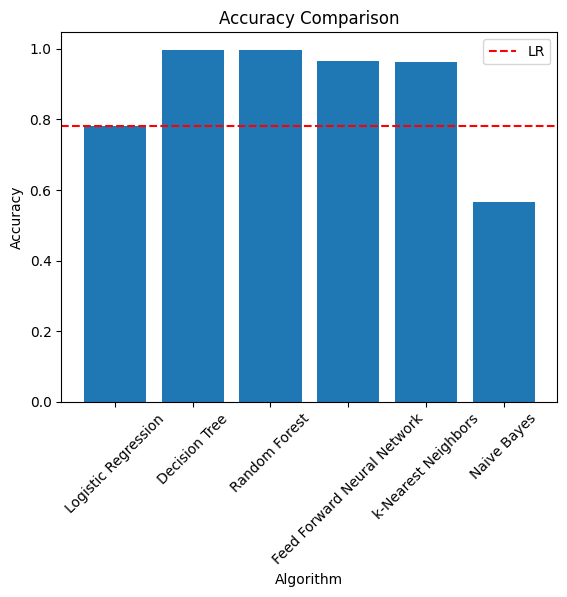

In [18]:
#visualisations comparation of the performance of different algorithms
# Bar Plot
import matplotlib.pyplot as plt

plt.bar(results_df.index, results_df['Accuracy'])
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.xticks(rotation=45)
plt.axhline(y=results_df.loc['Logistic Regression', 'Accuracy'], color='r', linestyle='--', label='LR')
plt.legend()
plt.show()

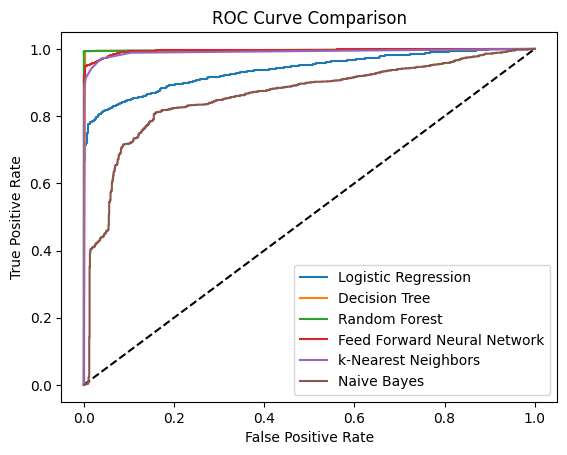

In [19]:
#ROC curve
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve

# convert categorical labels to binary labels
le = LabelEncoder()
y_test_binary = le.fit_transform(y_test)

plt.plot([0, 1], [0, 1], 'k--')
for name, model in models:
    fpr, tpr, thresholds = roc_curve(y_test_binary, model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=name)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

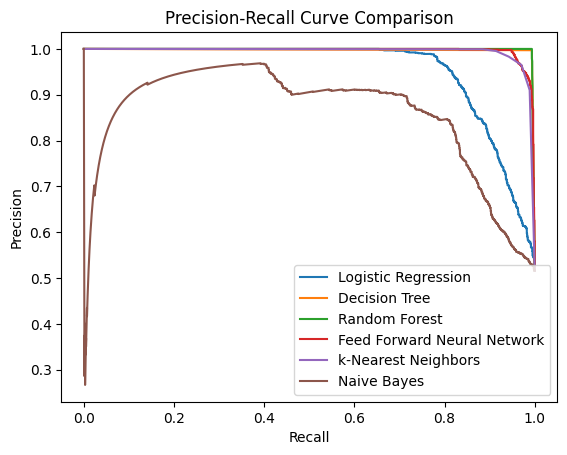

In [20]:
#Precision-Recall Curve
for name, model in models:
  precision, recall, thresholds = precision_recall_curve(y_test_binary, model.predict_proba(X_test)[:,1])
  plt.plot(recall, precision, label=name)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend(loc='lower right')
plt.show()

In [21]:
#Performing cross-validation
from sklearn.model_selection import cross_val_score
import numpy as np
for name, model in models:
    cv_scores = cross_val_score(model, X_train, y_train, cv=10)
    print("Model: ", name)
    print(f"Mean cross-validation score: {np.mean(cv_scores)}")

Model:  Logistic Regression
Mean cross-validation score: 0.7699844479004666
Model:  Decision Tree
Mean cross-validation score: 0.9953343701399688
Model:  Random Forest
Mean cross-validation score: 0.9976671850699846
Model:  Feed Forward Neural Network
Mean cross-validation score: 0.9744945567651632
Model:  k-Nearest Neighbors
Mean cross-validation score: 0.9679626749611197
Model:  Naive Bayes
Mean cross-validation score: 0.5640746500777606


In [22]:
#Using hyperparameter tuning to optimize the performance of the best-performing model
from sklearn.model_selection import GridSearchCV

lr_params = {"C": np.logspace(-3, 3, 7)}
lr_grid_search = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000, solver='saga'), lr_params, cv=10)
lr_grid_search.fit(X_train, y_train)
best_lr_model = lr_grid_search.best_estimator_

print(f"Best model: {best_lr_model}")

Best model: LogisticRegression(C=100.0, max_iter=1000, random_state=42, solver='saga')


In [23]:
#Evaluate the performance of the best-performing model
y_pred = best_lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Small')
recall = recall_score(y_test, y_pred, pos_label='Small')
f1 = f1_score(y_test, y_pred, pos_label='Small')
print(f"Best model performance: {best_lr_model}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("")

Best model performance: LogisticRegression(C=100.0, max_iter=1000, random_state=42, solver='saga')
Accuracy: 0.8810301051867973
Precision: 0.8344532681734881
Recall: 0.9599437807449052
F1 Score: 0.8928104575163398



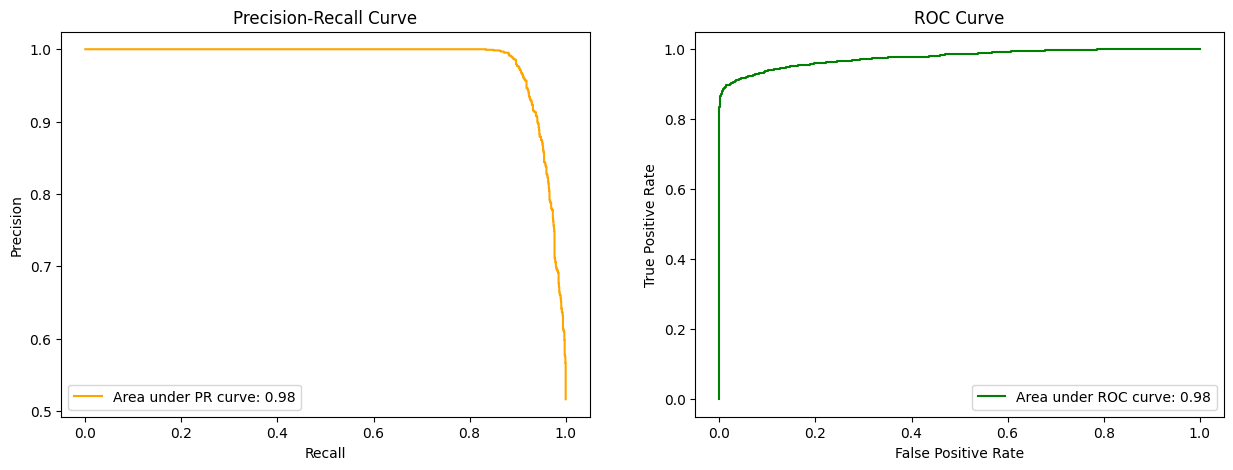

In [24]:
# Determine the threshold for identifying suspicious tax returns
best_lr_model.fit(X_train, y_train)
y_proba = best_lr_model.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_proba, pos_label='Small')
fpr, tpr, thresholds_roc = roc_curve(y_test, y_proba, pos_label='Small')
auc_score = auc(fpr, tpr)

# Plot the Precision-Recall curve and the ROC curve
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot the Precision-Recall curve
ax1.plot(recall, precision, color='orange', label=f"Area under PR curve: {auc_score:.2f}")
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('Precision-Recall Curve')
ax1.legend()

# Plot the ROC curve
ax2.plot(fpr, tpr, color='green', label=f"Area under ROC curve: {auc_score:.2f}")
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve')
ax2.legend()

In [25]:
# Set the threshold for identifying suspicious tax returns
threshold = 0.35
print(f"Threshold for identifying suspicious tax returns: {threshold:.2f}")

# Identify suspicious tax returns
best_lr_model.fit(X_train, y_train)
y_proba = best_lr_model.predict_proba(X_test)[:,1]
y_pred = (y_proba >= threshold).astype(int) #creates a binary classification based on the threshold
fraudulent_cases = X_test[y_pred==1, :10] # select only the columns used for prediction
fraudulent_cases_df = pd.DataFrame(fraudulent_cases, columns=X.columns[:10])
print(f"Number of suspicious tax returns identified: {len(fraudulent_cases)}")

Threshold for identifying suspicious tax returns: 0.35
Number of suspicious tax returns identified: 1896


In [26]:
#Compare the performance of each model
names = []
accuracies = []
precisions = []
recalls = []
f1s = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='Small')
    recall = recall_score(y_test, y_pred, pos_label='Small')
    f1 = f1_score(y_test, y_pred, pos_label='Small')
    names.append(name)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)
    results_df = pd.DataFrame({"Model": names, "Accuracy": accuracies, "Precision": precisions, "Recall": recalls, "F1 Score": f1s})
print(results_df)

                         Model  Accuracy  Precision    Recall  F1 Score
0          Logistic Regression  0.781647   0.722735  0.936051  0.815677
1                Decision Tree  0.995285   0.997179  0.993675  0.995424
2                Random Forest  0.996736   1.000000  0.993675  0.996828
3  Feed Forward Neural Network  0.965542   0.968265  0.964863  0.966561
4          k-Nearest Neighbors  0.961915   0.983138  0.942375  0.962325
5                  Naive Bayes  0.565832   0.544175  0.978215  0.699322


In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [28]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,
                      title='Confusion matrix')
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

NameError: ignored